In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [2]:
elon=pd.read_csv("Elon_musk.csv")
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
elon.drop(['Unnamed: 0'],inplace=True,axis=1)
elon

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
elon = [Text.strip() for Text in elon['Text']]      # removing the trailing and leading characters

In [9]:
elon = [Text for Text in elon if Text]           # removing the empty strings from the data
elon[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [10]:
# joining the list of comments into a single text/string

text = ' '.join(elon)

In [11]:
text

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [12]:
len(text)

158805

In [16]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))

In [17]:
no_punc_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [18]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won�t give you your private keys should be avoid

In [23]:
from nltk.tokenize import word_tokenize  #Tokenization
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I�m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It�s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X',

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajink\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajink\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
len(text_tokens)

20466

In [28]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I�m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It�s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001F923',

In [31]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['won�t', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'your', 'app', 'sucks', 'rt', 'spacex', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'ajtourville', 'blkmdl3', 'rationaletienne', 'adamklotz', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'adamklotz', 'starlink', 'staggeringly', 'difficult', 'technical', 'amp', 'economic', 'endeavor', 'however', 'don�', 'rationaletienne', 'adamklotz', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'or�', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g�', 'adamklotz', 'it�s', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'amp', 'shipping', 'tobyliiiiiiiiii', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'coindesk', 'tesla', 'danzpal

In [36]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['won�t', 'give', 'privat', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'suck', 'rt', 'spacex', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'ajtourvil', 'blkmdl3', 'rationaletienn', 'adamklotz', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'adamklotz', 'starlink', 'staggeringli', 'difficult', 'technic', 'amp', 'econom', 'endeavor', 'howev', 'don�', 'rationaletienn', 'adamklotz', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'or�', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g�', 'adamklotz', 'it�', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'amp', 'ship', 'tobyliiiiiiiiii', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'coindesk', 'tesla', 'danzpalm', 'u0001f923u0001f923', 'xprize', 'team']


In [37]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 i�m alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine it�s getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power freewalletorg any crypto wallet won�t give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville blkmdl3 rationaletienne adamklotz once predict cash fl

In [40]:
lemmas = [token.lemma_ for token in doc]

In [41]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 I � m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest geoffkeighley unrealengine it � s getting real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power freewalletorg any crypto wallet win � t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville blkmdl3 rationaletienne adamklotz once predict cash flow reasonably wel

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [43]:
print(cv.vocabulary_)

{'kunalb11': 2042, 'alien': 230, 'idaacarmack': 1782, 'ray': 2956, 'trace': 3822, 'cyberpunk': 961, 'hdr': 1671, 'nextlevel': 2493, 'have': 1665, 'try': 3857, 'joerogan': 1962, 'spotify': 3448, 'great': 1607, 'interview': 1891, 'gtera27': 1624, 'doge': 1114, 'underestimate': 3986, 'teslacn': 3668, 'congratulations': 857, 'tesla': 3662, 'china': 740, 'amazing': 255, 'execution': 1322, 'last': 2061, 'year': 4255, 'now': 2533, 'next': 2492, 'even': 1292, 'happy': 1652, 'new': 2489, 'ox': 2654, 'frodo': 1489, 'underdoge': 3985, 'all': 232, 'think': 3739, 'would': 4230, 'fail': 1358, 'himself': 1716, 'owensparks': 2651, 'flcnhvy': 1432, 'anonyx10': 284, 'haha': 1638, 'thanks': 3706, 'indeed': 1831, 'tweets': 3877, 'definitely': 1015, 'represent': 3040, 'realworld': 2981, 'time': 3764, 'allocation': 234, 'the': 3713, 'entertaining': 1249, 'outcome': 2629, 'likely': 2122, 'givedirectly': 1575, 'just': 1990, 'send': 3225, 'agree': 201, 'clubhouse': 781, 'kanyewest': 1999, 'geoffkeighley': 1554

In [47]:
print(cv.get_feature_names()[100:200])

['4thfromourstar', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '727pm', '74', '78', '7th', '90', '9007', '91demigod', '922', '948', '95', '99', '9inety6prince', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'adamblitzer', 'adamhoov', 'adamkiotz', 'adamklotz', 'add', 'additive', 'address', 'adlanbogatyryov', 'administer', 'adolfomoreno', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'afloathickory', 

In [50]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
print(tweetscv.toarray().shape)

(16151, 4287)


In [56]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)  #Bigrams and Trigrams
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [60]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'be', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'well', 'wholemarsblog', 'will', 'work', 'would',

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer    #Tf idf Vectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [62]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'crew', 'crew1', 'curevac', 'cyberpunkgame', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'design', 'detail', 'didn', 'd

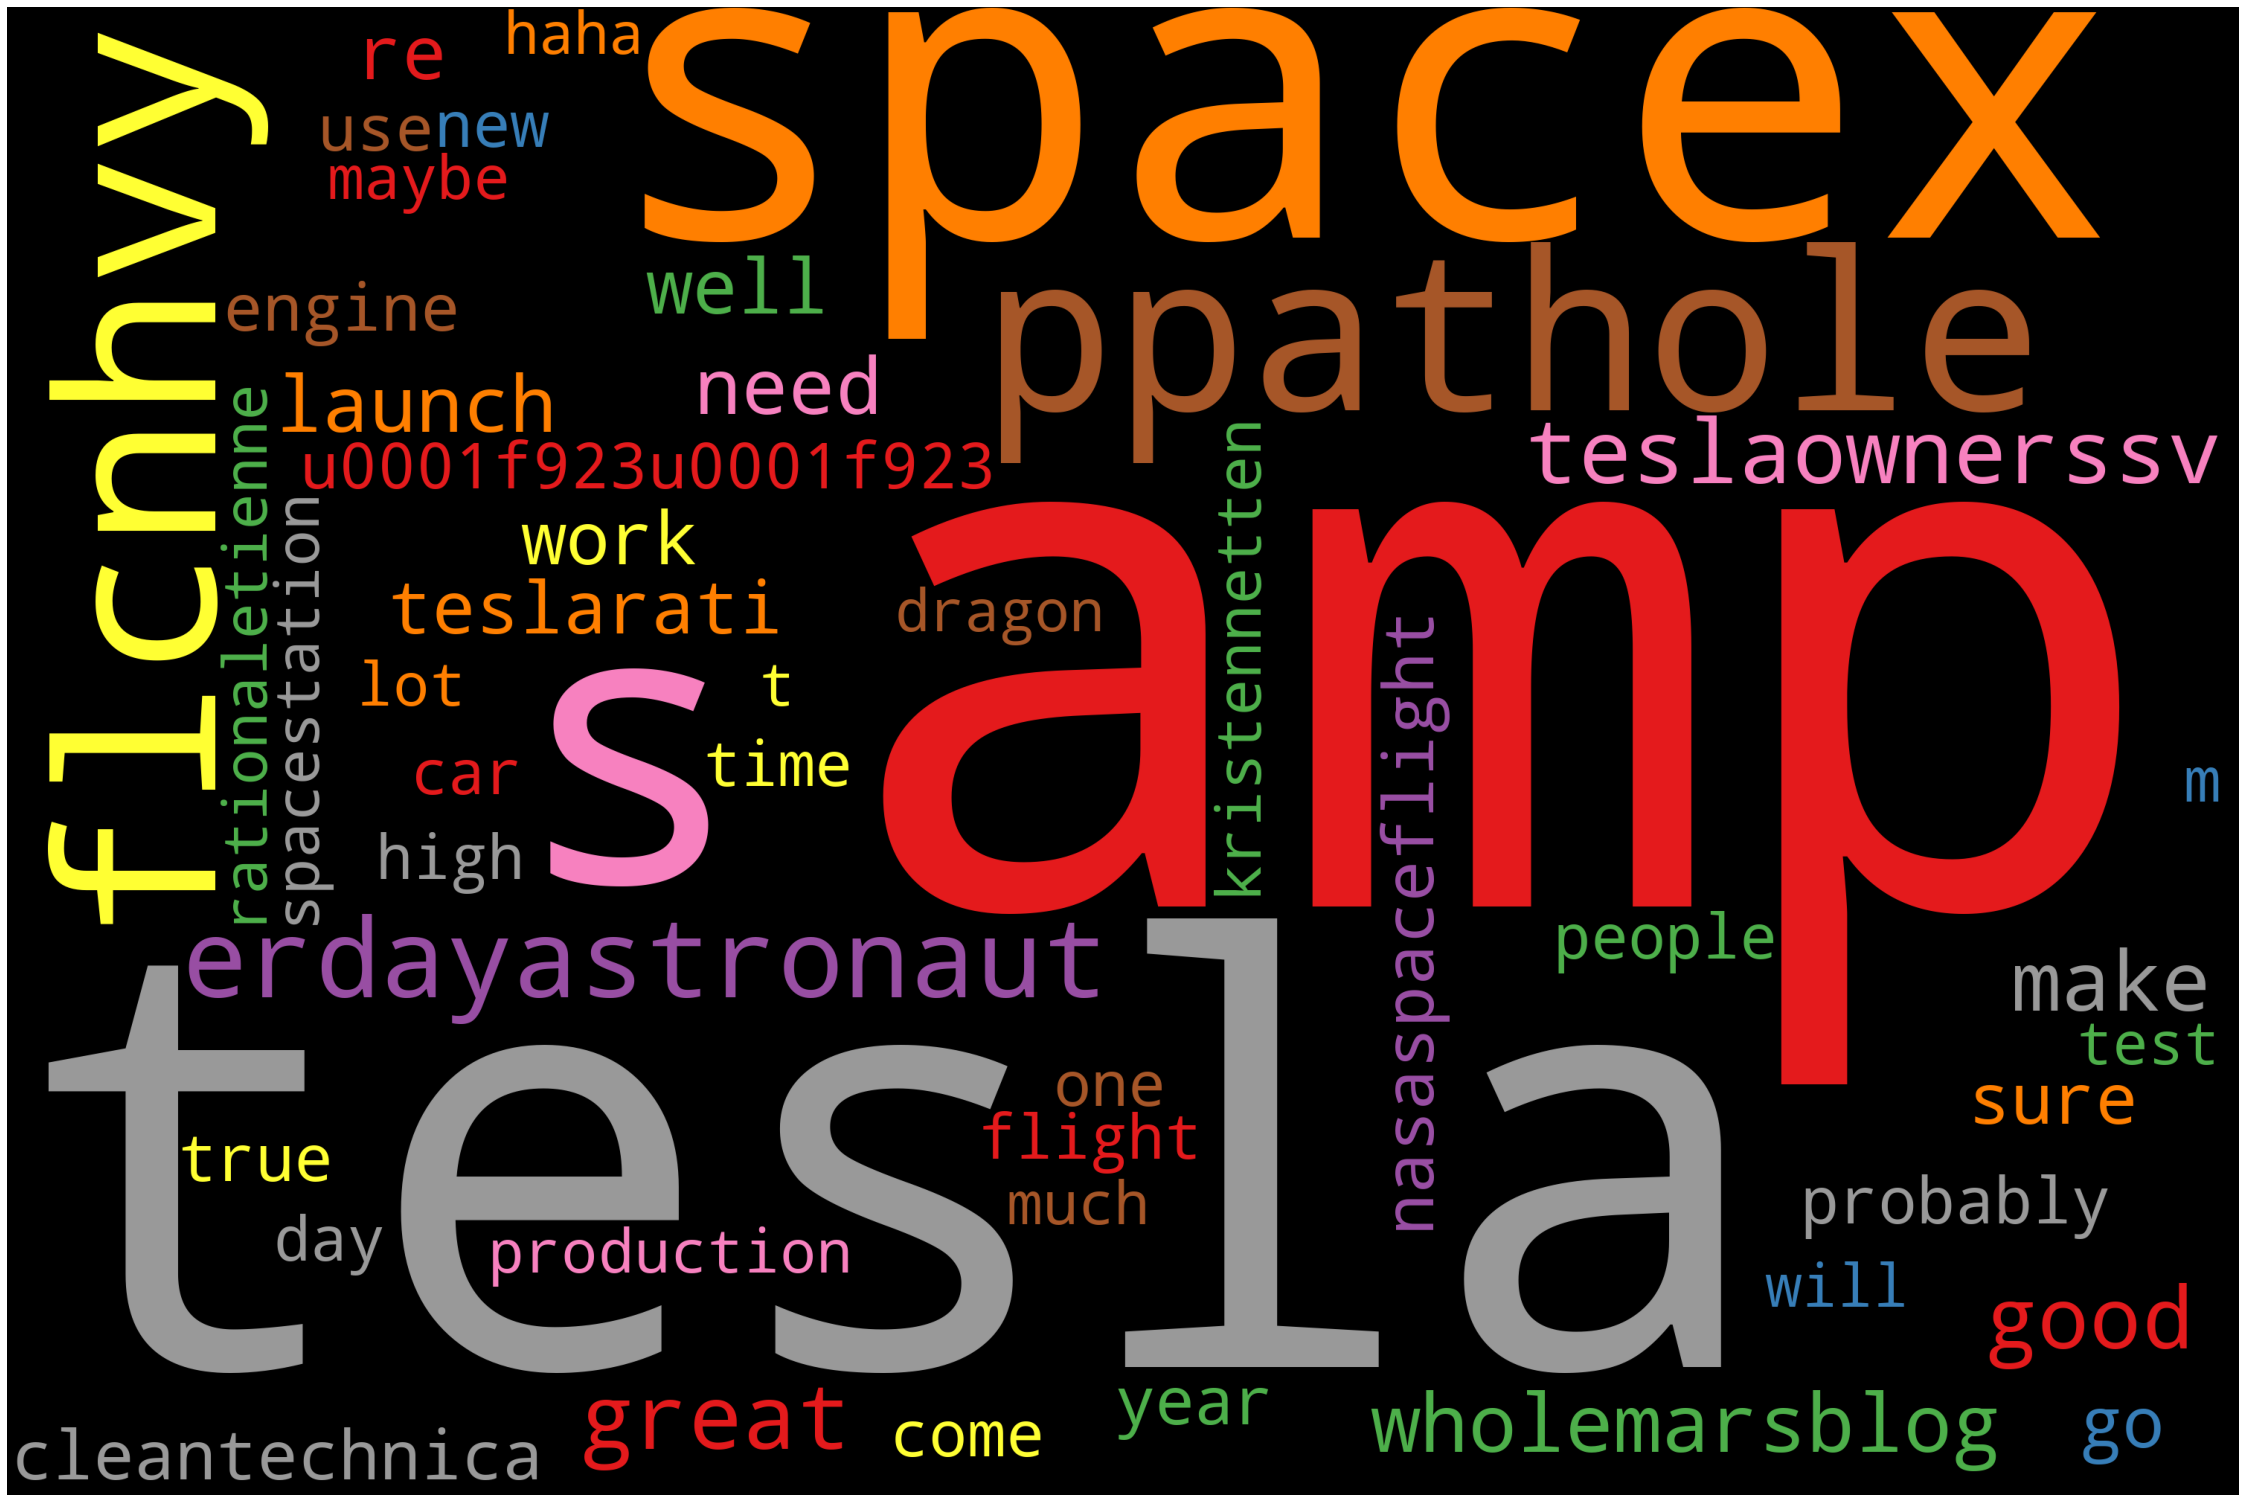

In [65]:
def plot_cloud(wordcloud):             #word cloud
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [66]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [67]:
for token in doc_block[100:200]:
    print(token,token.pos_)

freewalletorg NOUN
any DET
crypto ADJ
wallet NOUN
win VERB
� PROPN
t PROPN
give VERB
private ADJ
key NOUN
avoid NOUN
cost NOUN
freewalletorg NOUN
your PRON
app NOUN
suck NOUN
rt PROPN
spacex PROPN
nasa PROPN
select ADJ
falcon NOUN
heavy ADJ
launch NOUN
first ADV
two NUM
element ADJ
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
ajtourville NOUN
blkmdl3 NOUN
rationaletienne PROPN
adamklotz PROPN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo NOUN
rationaletienne PROPN
adamklotz PROPN
starlink VERB
staggeringly ADV
difficult ADJ
technical ADJ
amp PROPN
economic ADJ
endeavor NOUN
however ADV
don PROPN
� PROPN
rationaletienne PROPN
adamklotz PROPN
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
or CCONJ
� PROPN
idaacarmack VERB
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g PROPN
� PROPN
adamklotz NOUN
it PRON

In [68]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['table', 'miss', 'work', 'go', 'seem', 'appear', 'fix', 'coin', 'unit', 'time', 'michaelgalanin', 'kevinmgill', 'launch', 'tower', 'raptor', 'orbit', 'improve', 'ship', 'work', 'tonight', 'ogecoin', 'video', 'people', 'speak', 'lexfridman', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'amp', 'pain', 'let', 'doge', 'rainforest', 'come', 'itsallrisky', 'simplicity', 'genius', 'astrogdogg', 'spacex', 'jbuttermost', 'dogecoinrich', 'wapodavenport', 'dogecoinrich', 'flcnhvy', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'time', 'tell', 'story', 'theonion', 'read', 'thebabylonbee', 'kingdom', 'hear', 'name', 'year', 'grimezsz', 'dogecake', 'yolt', 'kristennetten', 'damian', 'kristennetten', 'owenspark', 'thing', 'restaurant', 'get', 'currency', 'earth', 'redlineshifter', 'scratch', 'wonderofscience', 'destiny', 'franz', 'erdayastronaut', 'spacex', 'say', 'ship', 'landing', 'burn', 'solution', 'spacex', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'spacex'

In [75]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,spacex,211
1,amp,122
2,make,64
3,launch,58
4,erdayastronaut,52
5,teslaownerssv,50
6,year,48
7,work,47
8,need,47
9,tesla,43


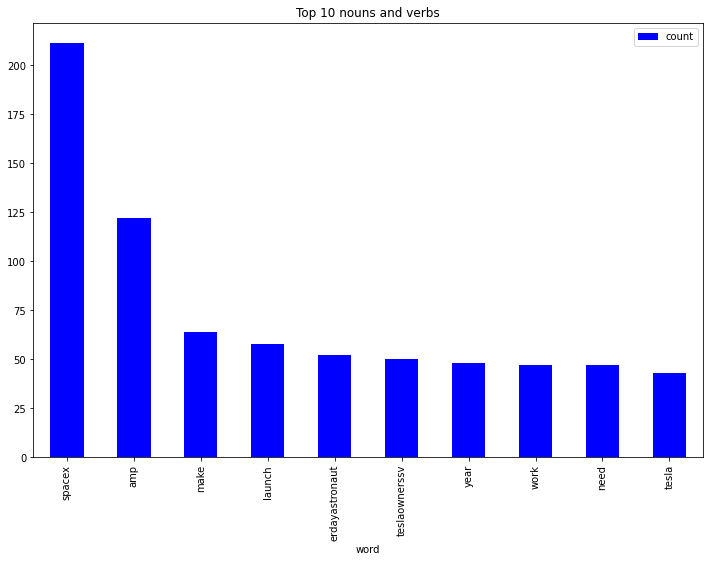

In [76]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs',color = 'blue');

In [80]:
afinn = pd.read_csv("C:/Users/ajink/Downloads/Afinn (1).csv")
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [82]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [86]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [87]:
# manual testing
calculate_sentiment(text='great')

3

In [90]:
sentence = tokenize.sent_tokenize(' '.join(elon))
sentence[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won�t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

In [91]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [94]:
# Calculating sentiment value for each sentences
sent_df['sentiment_value']=sent_df['sentences'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
909    0
910   -4
911    0
912   -2
913    0
Name: sentiment_value, Length: 914, dtype: int64

In [95]:
# how many words are there in a sentences?
sent_df['word_count']=sent_df['sentences'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
909    11
910    31
911     3
912    47
913    15
Name: word_count, Length: 914, dtype: int64

In [96]:
sent_df.sort_values(by='sentiment_value')

,sentences,sentiment_value,word_count
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
828,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
473,"He plays the �poor inventor� card, but was ric...",-5,34
672,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231


In [97]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.400438
std        2.697904
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [98]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentences,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can�t b� ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [102]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentences,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,7,109
17,Back to work I go � @CapybaraSurfer @MattWalla...,4,39
...,...,...,...
901,He was one of the very best.,3,7
903,"@Ali_Afshari In general, we need to improve ho...",4,87
905,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",7,15
907,This is both great &amp; terrifying.,3,6


In [103]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentences,sentiment_value,word_count,index
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,909
910,"It may never pay out, as the stock can�t b� ht...",-4,31,910
911,Details Aug 28.,0,3,911
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,912


C:\Users\ajink\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

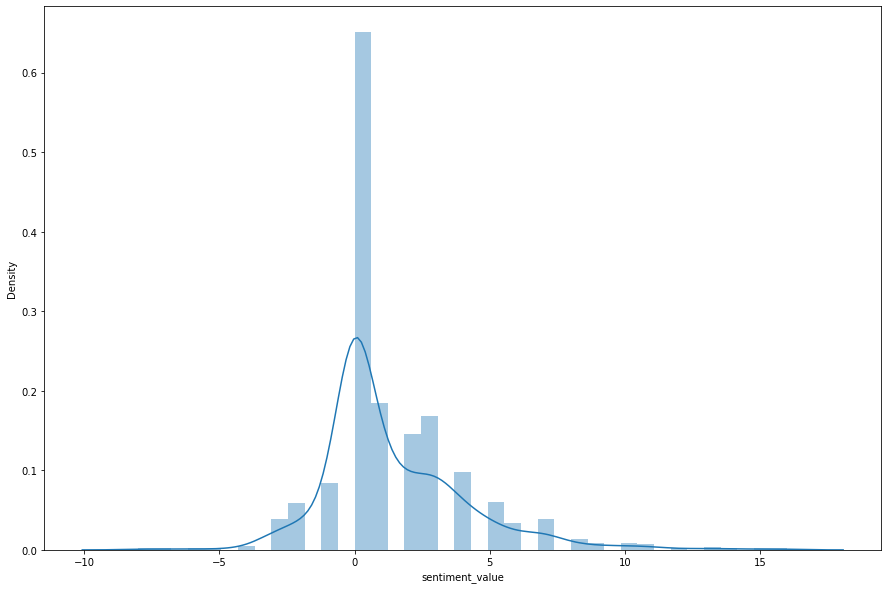

In [104]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:ylabel='sentiment_value'>

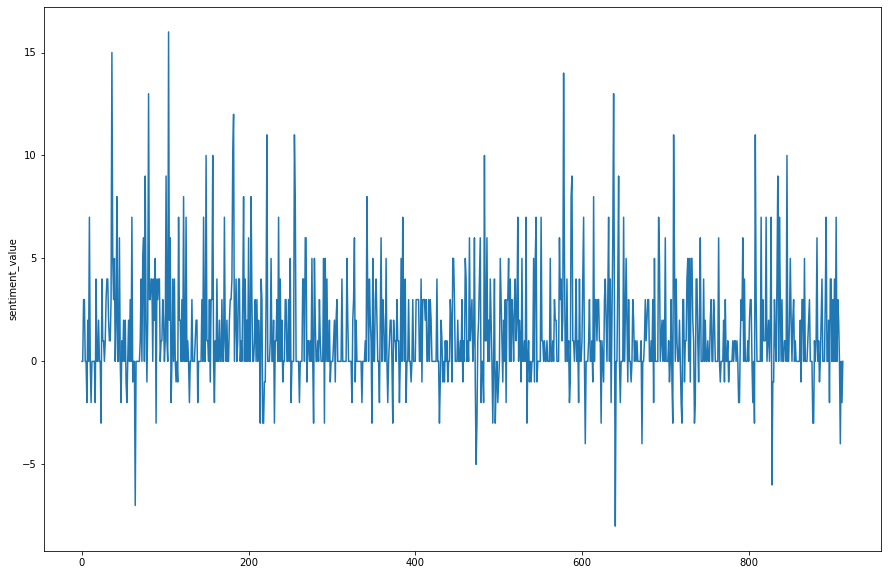

In [106]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_value'], data = sent_df)